In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\train" 
test_dir = r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test"

In [3]:
width, height = 720, 720

In [4]:
batch_size = 32

In [5]:
train_dataset = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
test_dataset = ImageDataGenerator(rescale=1./255)

In [7]:
train_data = train_dataset.flow_from_directory(
    train_dir,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 251 images belonging to 3 classes.


In [8]:
test_data = test_dataset.flow_from_directory(
    test_dir,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 66 images belonging to 3 classes.


In [9]:
train_data.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [10]:
test_data.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(width, height, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(3, activation="softmax")
])

In [14]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
history = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20
8/8 [==============================] - 101s 12s/step - loss: 9.8070 - accuracy: 0.4064 - val_loss: 1.2574 - val_accuracy: 0.4697
Epoch 2/20
8/8 [==============================] - 87s 11s/step - loss: 0.9097 - accuracy: 0.6295 - val_loss: 1.5934 - val_accuracy: 0.4545
Epoch 3/20
8/8 [==============================] - 89s 11s/step - loss: 0.7007 - accuracy: 0.6773 - val_loss: 2.3131 - val_accuracy: 0.3636
Epoch 4/20
8/8 [==============================] - 106s 13s/step - loss: 0.6823 - accuracy: 0.7211 - val_loss: 1.8368 - val_accuracy: 0.6364
Epoch 5/20
8/8 [==============================] - 96s 10s/step - loss: 0.5263 - accuracy: 0.7809 - val_loss: 1.5532 - val_accuracy: 0.6364
Epoch 6/20
8/8 [==============================] - 89s 11s/step - loss: 0.3821 - accuracy: 0.8526 - val_loss: 1.5637 - val_accuracy: 0.6667
Epoch 7/20
8/8 [==============================] - 89s 11s/step - loss: 0.4315 - accuracy: 0.8327 - val_loss: 1.7972 - val_accuracy: 0.6364
Epoch 8/20
8/8 [=========

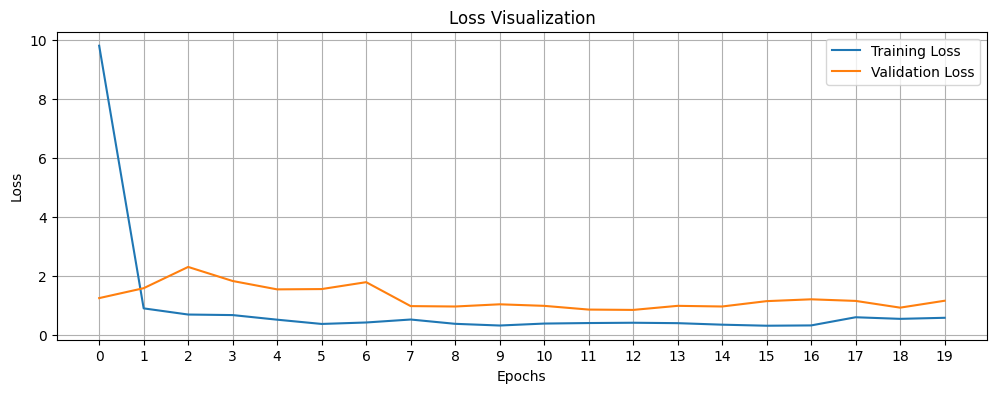

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.xticks(range(0, 20))
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

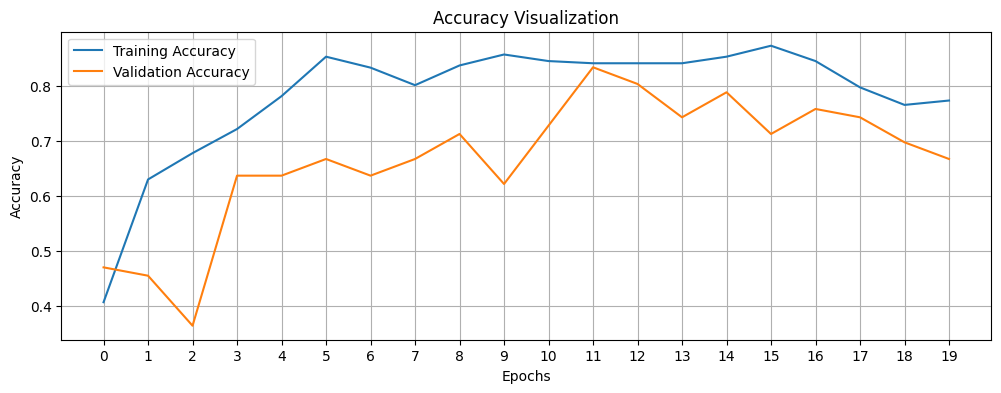

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.grid()
plt.xticks(range(0, 20))
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [22]:
classes = {val:key for key, val in train_data.class_indices.items()}

In [23]:
classes

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [35]:
def predict_image(path):
    img = load_img(path, target_size=(width, height))
    img_arr = img_to_array(img)/255.
    flatten_img = np.expand_dims(img_arr, axis=0)
    predicted = model.predict(flatten_img)
    pred_index = np.argmax(predicted[0])
    acc = f"Accuracy {np.round(predicted.max()*100, decimals=2)}%"
    return classes[pred_index], acc

In [36]:
predict_image(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Covid\0108.jpeg")

1/1 [==============================] - 0s 88ms/step


('Covid', 'Accuracy 96.33%')

In [37]:
predict_image(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Normal\0116.jpeg")

1/1 [==============================] - 0s 87ms/step


('Covid', 'Accuracy 47.91%')

In [38]:
predict_image(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Viral Pneumonia\0102.jpeg")

1/1 [==============================] - 0s 95ms/step


('Covid', 'Accuracy 49.23%')